In [155]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns
from scipy.stats import chi2, chi2_contingency

# Exploratory Data Analysis and Hypothesis Testing

## Introduction

In the `EDA_Hypothesis.ipynb` file, we conduct an in-depth Exploratory Data Analysis (EDA) and formulate hypotheses for our football match prediction project. The EDA process involves:
 -  Examining the dataset's summary statistics.
 - Investigating the distribution of player and team ratings.
 - Analyzing the average goals per match in different leagues.
 - We also explore the win, draw, and loss percentages by league when playing at home. 

The hypotheses revolve around home team advantage and the impact of player ratings on match outcomes. We test these hypotheses using statistical tests, such as the Chi-Square Test. 

The insights gained from this EDA and hypothesis testing will be crucial in understanding the data and identifying potential features for our predictive models. The ultimate goal is to develop a model that can reliably predict the outcome of a football match, notably the home team's victory, and a model that can predict whether a football match will end with 'Under' or 'Over' 2.5 goals.

In [156]:
matches = pd.read_csv('matches.csv')

## Summary statistics

In [157]:
matches.describe()

,match_api_id,home_team_goal,away_team_goal,stage,home_player_1,away_player_1,home_player_2,away_player_2,home_player_3,away_player_3,...,defenders_away_rating,defenders_away_total_rating,midfielders_home_rating,midfielders_home_total_rating,midfielders_away_rating,midfielders_away_total_rating,forwards_home_rating,forwards_home_total_rating,forwards_away_rating,forwards_away_total_rating
count,2.597900e+04,25979.000000,25979.000000,25979.000000,24755.000000,24745.000000,24664.000000,24701.000000,24698.000000,24686.000000,...,24147.000000,25979.0000,24147.000000,25979.000000,24147.000000,25979.000000,24058.000000,25979.000000,24051.000000,25979.000000
mean,1.195429e+06,1.544594,1.160938,18.242773,65.675460,65.686199,63.394340,63.369621,65.572314,65.580005,...,64.486660,235.4285,64.777029,254.930290,64.667707,255.578005,66.590267,109.416567,66.459768,107.909735
std,4.946279e+05,1.297158,1.142110,10.407354,9.595997,9.618903,8.496123,8.449127,9.157760,9.153018,...,5.941133,71.3121,6.109238,89.607127,6.089956,90.043588,8.554526,58.149986,8.510538,58.095934
min,4.831290e+05,0.000000,0.000000,1.000000,42.000000,42.000000,38.000000,38.000000,37.000000,38.000000,...,46.000000,0.0000,45.000000,0.000000,42.500000,0.000000,35.000000,0.000000,36.000000,0.000000
25%,7.684365e+05,1.000000,0.000000,9.000000,59.000000,59.000000,58.000000,58.000000,59.000000,59.000000,...,60.500000,232.0000,60.500000,217.000000,60.400000,217.000000,61.000000,65.000000,61.000000,64.000000
50%,1.147511e+06,1.000000,1.000000,18.000000,64.000000,64.000000,63.000000,63.000000,65.000000,65.000000,...,63.750000,251.0000,64.000000,271.000000,64.000000,272.000000,65.835000,116.000000,65.500000,111.000000
75%,1.709852e+06,2.000000,2.000000,27.000000,72.000000,72.000000,69.000000,69.000000,72.000000,72.000000,...,68.250000,270.0000,68.500000,314.000000,68.400000,315.000000,72.000000,148.000000,72.000000,147.000000
max,2.216672e+06,10.000000,9.000000,38.000000,93.000000,93.000000,91.000000,91.000000,91.000000,91.000000,...,87.000000,381.0000,87.670000,458.000000,87.670000,459.000000,93.000000,267.000000,93.000000,265.000000


In [158]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 106 entries, match_api_id to forwards_away_total_rating
dtypes: float64(92), int64(6), object(8)
memory usage: 21.0+ MB


## League ratings

We will now look at the average player ratings by league. This data is crucial for understanding the skill levels of players in different leagues. It can also help identify leagues with higher or lower player ratings. This information is valuable for model creation, as it can aid in predicting match outcomes.

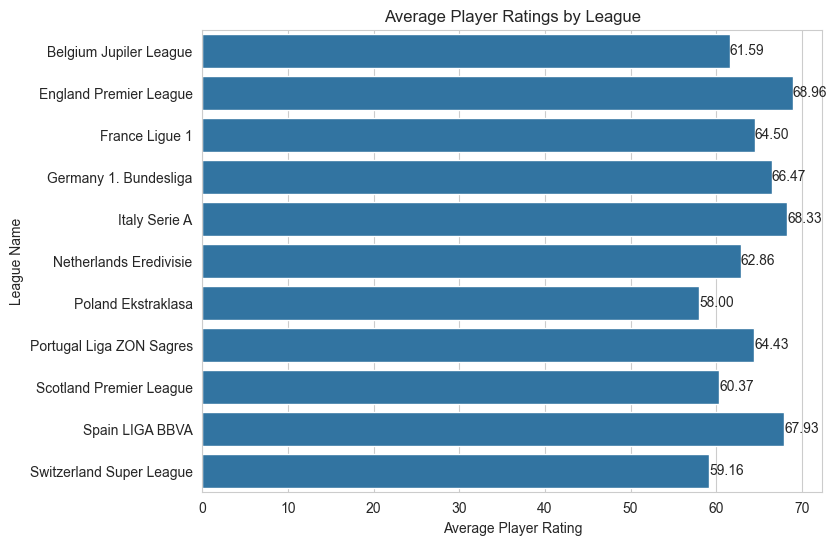

In [159]:
home_columns = [f'home_player_{i}' for i in range(1, 12)]
away_columns = [f'away_player_{i}' for i in range(1, 12)]

league_ratings = pd.concat([matches[col] for col in home_columns + away_columns], axis=1)

matches_with_ratings = pd.concat([matches['league_name'], league_ratings], axis=1)

average_ratings_by_league = round(matches_with_ratings.groupby('league_name').mean().mean(axis=1), 2)

plt.figure(figsize=(8, 6))
barplot = sns.barplot(y=average_ratings_by_league.index, x=average_ratings_by_league.values, orient='h')

plt.ylabel('League Name')
plt.xlabel('Average Player Rating')
plt.title('Average Player Ratings by League')

for p in barplot.patches:
    width = p.get_width()
    plt.text(width, p.get_y() + p.get_height() / 2, '{:1.2f}'.format(width), ha='left', va='center')

plt.show()

The analysis of player skill levels across different leagues has shown significant differences. This implies that the quality of play and the competitiveness can vary from league to league. Therefore, for our Exploratory Data Analysis (EDA) and subsequent modeling, we will focus on the top 5 leagues. 

The top 5 leagues typically refer to the Premier League (England), La Liga (Spain), Bundesliga (Germany), Serie A (Italy), and Ligue 1 (France). These leagues are considered the most competitive and attract the highest-quality players worldwide. 

Choosing to focus on these leagues for our EDA and modeling has several advantages:

1. **Quality of Play**: The top leagues attract the best players worldwide, ensuring a high standard of play. This can lead to more consistent data and more reliable models.

2. **Competitiveness**: These leagues are highly competitive, which can lead to a wide range of outcomes and scenarios for our models to learn from.

3. **Popularity**: The top leagues are the most watched and followed worldwide. Models based on these leagues are likely of interest to a larger audience.

4. **Data Quality**: The data for these leagues is more comprehensive and has fewer missing values in this dataset, which can lead to more robust and accurate models.

By focusing on the top 5 leagues, we can ensure that our models are based on high-quality, competitive matches and that our findings apply to the highest level of football.

In [160]:
matches = matches[matches['league_name'].isin(
    ['England Premier League', 'Spain LIGA BBVA', 'Germany 1. Bundesliga', 'Italy Serie A', 'France Ligue 1'])]

## Games played by season and by league

In [161]:
fig = px.bar(matches.groupby(['season', 'league_name']).size().reset_index(), y='season', x=0, color='league_name',
             title='Games Played by Season and by League',
             labels={'0': 'Number of Games', 'season': 'Season'},
             color_discrete_sequence=px.colors.qualitative.Set1,
             orientation='h')

fig.update_layout(
    title={
        'text': "Games Played by Season and by League",
        'y': 0.9,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    legend_title_text='League Name',
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=1,
        bgcolor='lightgrey'
    ),
    autosize=True,
    width=1100,
    height=700,
    margin=dict(
        l=50,
        b=100,
        t=100,
        pad=10
    )
)

fig.show()

![Number of games](figure.png)

The number of games played each season is consistent across the different leagues. In the German league, 308 games are played, while in other leagues, the number is typically 380 games per season. Notably, in the 2011/2012 season, the Italian league had fewer games than usual, with 358 games instead of the typical 380. However, this variation is not significant. Therefore, for modeling purposes, the German league will have the fewest games, while the other leagues will have a consistent number of games.

## Player ratings

We will now look at the distribution of player ratings in the dataset. We will do this by plotting a histogram of the player ratings.

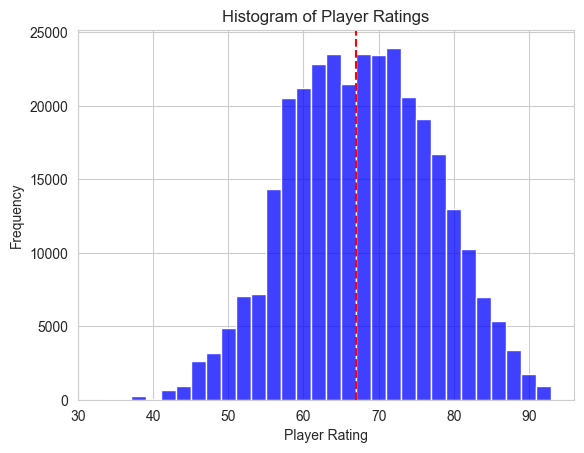

In [162]:
home_columns = [f'home_player_{i}' for i in range(1, 12)]
away_columns = [f'away_player_{i}' for i in range(1, 12)]

player_ratings = pd.concat([matches[col] for col in home_columns + away_columns])

sns.set_style('whitegrid')

sns.histplot(player_ratings.dropna(), bins=30, kde=False, color='blue')

median = player_ratings.median()

plt.axvline(median, color='r', linestyle='--')

plt.title('Histogram of Player Ratings')
plt.xlabel('Player Rating')
plt.ylabel('Frequency')

plt.show()

We can see that the player ratings are normally distributed with a median of around 68.

- Player rating distribution by league

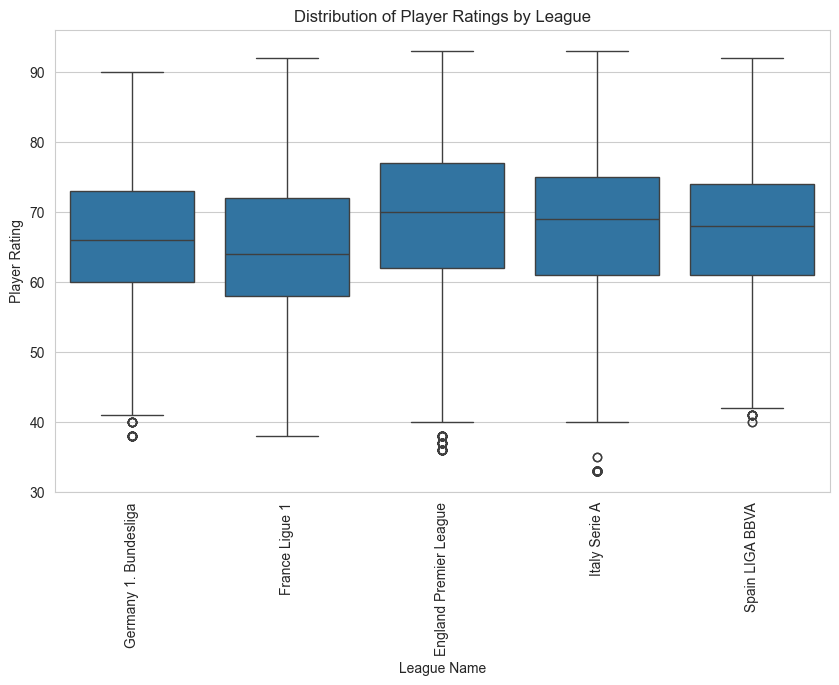

In [163]:
player_ratings = pd.concat([matches[col] for col in home_columns + away_columns], axis=1)

matches_with_ratings = pd.concat([matches['league_name'], player_ratings], axis=1)

melted = pd.melt(matches_with_ratings, id_vars='league_name', value_vars=home_columns + away_columns)

plt.figure(figsize=(10, 6))
sns.boxplot(x='league_name', y='value', data=melted)
plt.title('Distribution of Player Ratings by League')
plt.xlabel('League Name')
plt.ylabel('Player Rating')
plt.xticks(rotation=90)
plt.show()

The presence of outliers in player ratings across leagues is expected, as there will always be certain players whose performance significantly deviates from the majority. This could be related to factors such as some very young players playing for the first time and having a lower overall rating. The distribution of player ratings is mainly consistent across the various leagues, with most ratings falling between 60 and 75. The England Premier League has the highest median player rating and the broadest distribution of player ratings.

## Team ratings distribution by league

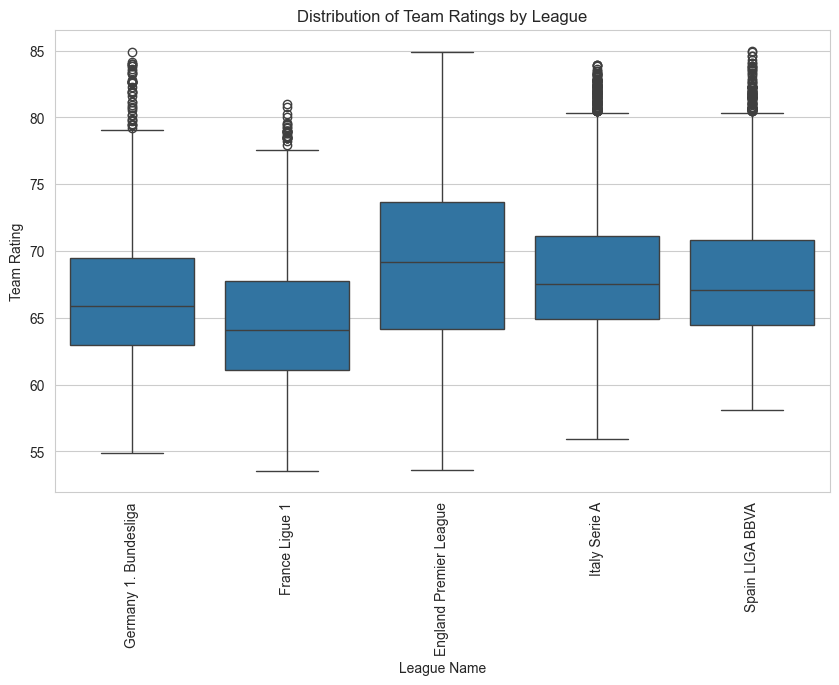

In [164]:
team_ratings = pd.concat([matches['average_home_player_rating'], matches['average_away_player_rating']], axis=1)

matches_with_ratings = pd.concat([matches['league_name'], team_ratings], axis=1)

melted = pd.melt(matches_with_ratings, id_vars='league_name',
                 value_vars=['average_home_player_rating', 'average_away_player_rating'])

plt.figure(figsize=(10, 6))
sns.boxplot(x='league_name', y='value', data=melted)
plt.title('Distribution of Team Ratings by League')
plt.xlabel('League Name')
plt.ylabel('Team Rating')
plt.xticks(rotation=90)
plt.show()

The England Premier League stands out as it has the highest median team rating and no outliers, indicating high competitiveness. In contrast, the other four leagues have outliers, suggesting that specific teams significantly outperform others in their respective leagues. This information is valuable for model creation as it can aid in predicting match outcomes. We will now investigate which teams these outliers are.

In [165]:
outlier_teams = []

for league in matches['league_name'].unique():
    league_matches = matches[matches['league_name'] == league]

    for team_type in ['home', 'away']:
        column = f'average_{team_type}_player_rating'
        Q1 = league_matches[column].quantile(0.25)
        Q3 = league_matches[column].quantile(0.75)
        IQR = Q3 - Q1

        outliers = league_matches[(league_matches[column] > (Q3 + 1.5 * IQR))]

        outlier_teams.extend([team for team in outliers[f'{team_type}_team'].unique()])

outlier_teams = list(set(outlier_teams))
outlier_teams

['Inter',
 'Milan',
 'SV Werder Bremen',
 'Roma',
 'Valencia CF',
 'FC Bayern Munich',
 'Olympique Lyonnais',
 'Juventus',
 'FC Barcelona',
 'Atlético Madrid',
 'Real Madrid CF']

We will add a new column to the matches DataFrame, indicating whether a team is an outlier. This data can be helpful when building our model, as it can assist in forecasting the results of matches.

In [166]:
outlier_teams_set = set(outlier_teams)


def is_outlier(team):
    return int(team in outlier_teams_set)


matches['home_team_outlier'] = matches['home_team'].apply(is_outlier)
matches['away_team_outlier'] = matches['away_team'].apply(is_outlier)

## Average goals per match in different leagues

We're about to compute the average count of goals per match for each league. This data is crucial for grasping the scoring trends in various leagues. It can also pinpoint leagues with matches that are high or low-scoring. This data is beneficial for model creation, as it aids in recognizing leagues where scoring goals is more or less probable.

In [167]:
required_columns = ['league_name', 'season', 'home_team_goal', 'away_team_goal']

grouped = matches.groupby(['league_name', 'season'])

total_goals = grouped[['home_team_goal', 'away_team_goal']].sum().sum(axis=1)

num_matches = grouped.size()

average_goals = round(total_goals / num_matches, 2)
average_goals = average_goals.to_frame().reset_index()
average_goals = average_goals.rename(columns={0: 'average_goals'})

In [168]:
fig = px.line(average_goals, x='season', y='average_goals', color='league_name',
              title='Average Goals per Match by Season and League',
              labels={'average_goals': 'Average Goals per Match', 'season': 'Season'},
              hover_data=['average_goals'],
              hover_name='league_name')

fig.update_traces(hovertemplate='Season: %{x}<br>Average Goals: %{y}')

fig.update_layout(
    title={
        'text': "Average Goals per Match by Season and League",
        'y': 0.9,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    legend_title_text='League Name',
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=0.01
    ),
    autosize=False,
    width=1100,
    height=700,
    margin=dict(
        l=50,
        b=100,
        t=100,
        pad=10
    )
)

fig.show()

Most average goals are scored in Germany Bundesliga, least in France Ligue 1. The average goals per match are consistent across the various leagues, just France Ligue 1 has a trend of increasing average goals per match over the years.

## Win, draw, and loss percentages by league playing at home

In [169]:
result_counts = matches.groupby(['league_name', 'result']).size()

total_counts = matches.groupby('league_name').size()

result_percentages = (result_counts / total_counts).round(2)

result_percentages = result_percentages.reset_index(name='percentage')

result_percentages['percentage'] = result_percentages['percentage'] * 100
result_percentages_long = result_percentages.melt(id_vars=['league_name', 'result'], value_vars='percentage')

fig = px.bar(result_percentages_long, x='league_name', y='value', color='result',
             labels={'value': 'Percentage', 'league_name': 'League Name'},
             facet_col='result', category_orders={'result': ['Win', 'Draw', 'Lose']},
             title='Percentage of Match Results by League',
             hover_data={'result': False})

fig.update_layout(autosize=False, width=1100, height=700,
                  title={'text': "Percentage of Match Results by League",
                         'y': 0.9, 'x': 0.5, 'xanchor': 'center', 'yanchor': 'top'})

fig.layout.annotations = []

fig.show()

The variations in home game results across different leagues are slight. The Spanish league leads with the highest winning percentage. The French league records the highest percentage of draws, while the German league has the highest loss percentage.

### Summary

During the Exploratory Data Analysis (EDA) of the `matches` dataset, we discovered:

- The leagues with the highest player ratings are the English Premier League, Spain LIGA BBVA, Germany 1. Bundesliga, Italy Serie A, and France Ligue 1. We have decided to concentrate on these leagues for our Exploratory Data Analysis (EDA) and subsequent modeling.
- The number of games played each season is consistent across the different leagues.
- Player ratings are normally distributed with a median of around 68.
- Player ratings are consistent across leagues, suggesting a uniform player caliber.
- Outliers exist in player ratings, but outliers are in underperforming players
- The England Premier League stands out as it has the highest median team rating and no outliers, indicating high competitiveness. This suggests that the England Premier League is highly competitive with a high standard of teams.
- Outlier teams in other leagues were identified based on player ratings' Interquartile Range (IQR).
- A new column was added to the `matches` DataFrame to indicate outlier teams.
- The German Bundesliga has the highest average goals per match, while France's Ligue 1 has the lowest.
- The variations in home game results across different leagues are slight. The Spanish league leads with the highest winning percentage. The French league records the highest percentage of draws, while the German league has the highest loss percentage.

# Hypothesis Testing

## Home team advantage

- Null Hypothesis (H0): There is no significant difference between the number of matches won by the home team and the number of matches won by the away team. 
- Alternative Hypothesis (H1): There is a significant difference between the number of matches won by the home team and the number of matches won by the away team. 

Now, we are about to perform the Chi-Square test. This test is a statistical method used to determine if a significant association exists between two categorical variables in a sample. The results of this test will provide us with the following values:

- **Degrees of Freedom**: This value reflects the number of values in the final calculation of a statistic that are free to vary. In the context of a Chi-Square test, it is calculated as (number of rows - 1) * (number of columns - 1) in a contingency table.

- **Critical Value**: This point on the test distribution is compared to the test statistic to determine whether to reject the null hypothesis. If the Chi-Square statistic is greater than the critical value, the null hypothesis would be rejected.

- **Chi-Square Statistic**: This is a single number that tells us how much difference exists between our observed counts and the counts we would expect if there were no relationship at all in the population. A more significant Chi-Square statistic corresponds to a tremendous difference between observed and expected counts.

- **P-value**: This is the probability of obtaining the observed data (or data more extreme) if the null hypothesis is true. It's a powerful tool in our statistical arsenal, as a smaller p-value indicates stronger evidence against the null hypothesis. If the p-value is less than 0.05, we reject the null hypothesis.

These results will help us understand the relationship between the variables we are testing and determine whether the observed differences are statistically significant.

In [170]:
contingency_table = pd.crosstab(matches['home_team'], matches['result'])
contingency_table.head()

result,Draw,Lose,Win
home_team,,,
1. FC Kaiserslautern,11,15,8
1. FC Köln,31,39,32
1. FC Nürnberg,21,34,30
1. FSV Mainz 05,29,35,55
AC Ajaccio,19,22,16


In [171]:
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

alpha = 0.05

critical_value = chi2.ppf(1 - alpha, dof)

print(f"Degrees of Freedom: {dof}")
print(f"Critical Value: {round(critical_value, 3)}")
print(f"Chi-Square Statistic: {round(chi2_stat, 3)}")
print(f"P-value: {round(p_value, 3)}")

Degrees of Freedom: 326
Critical Value: 369.106
Chi-Square Statistic: 1463.29
P-value: 0.0


The p-value is less than 0.05, so we reject the null hypothesis and conclude that there is a significant difference between the number of matches won by the home team and the number of matches won by the away team. This suggests a home team advantage.

## Player ratings and match outcomes

- Null Hypothesis (H0): The average player ratings do not significantly affect the match outcome.
- Alternative Hypothesis (H1): The average player ratings significantly affect the match outcome.


We will also apply the Chi-Square test for this hypothesis. The Chi-Square test will help us determine if there is a significant association between the average player ratings and the match outcomes. 

In [172]:
matches['average_home_player_rating'] = matches[home_columns].mean(axis=1)
matches['average_away_player_rating'] = matches[away_columns].mean(axis=1)

bins = [0, 60, 70, 100]
labels = ['Low', 'Medium', 'High']
matches['home_team_rating_category'] = pd.cut(matches['average_home_player_rating'], bins=bins, labels=labels)
matches['away_team_rating_category'] = pd.cut(matches['average_away_player_rating'], bins=bins, labels=labels)

contingency_table_players = pd.crosstab(matches['home_team_rating_category'], matches['result'])
contingency_table_players

result,Draw,Lose,Win
home_team_rating_category,,,
Low,261,329,324
Medium,2553,2918,4066
High,925,851,2358


In [173]:
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table_players)

alpha = 0.05

critical_value = chi2.ppf(1 - alpha, dof)

print(f"Degrees of Freedom: {dof}")
print(f"Critical Value: {round(critical_value, 3)}")
print(f"Chi-Square Statistic: {round(chi2_stat, 3)}")
print(f"P-value: {round(p_value, 3)}")

Degrees of Freedom: 4
Critical Value: 9.488
Chi-Square Statistic: 303.495
P-value: 0.0


The p-value is less than 0.05, so we reject the null hypothesis and conclude that the average player ratings significantly affect the match outcome.

### Hypothesis summary

The `EDA_Hypothesis` notebook conducts hypothesis testing for two key hypotheses related to a football match prediction project:

1. Home Team Advantage: The null hypothesis stated that there is no significant difference between the number of matches won by the home team and the number of matches won by the away team. The Chi-Square Test was used to test this hypothesis. The p-value was less than 0.05, leading to the rejection of the null hypothesis. This suggests a significant difference, indicating a home team advantage.

2. Player Ratings and Match Outcomes: The null hypothesis stated that the average player ratings do not significantly affect the match outcome. The Chi-Square Test was again used to test this hypothesis. The p-value was less than 0.05, leading to the rejection of the null hypothesis. This suggests that the average player ratings significantly affect the match outcome.

In conclusion, the statistical tests supported both hypotheses, indicating a home team advantage and a significant impact of player ratings on match outcomes.

# Saving the dataset

In [174]:
matches.to_csv('matches_top_5.csv', index=False)